In [1]:
import pandas as pd

df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [2]:
#Nueva caracteristica: Diferencia de goles (local - visitante)
# Filtrando donde Cebollitas FC haya sido local o visitante
df_partidos = df_partidos[
    (df_partidos["equipo_local"] == "Cebollitas FC") |
    (df_partidos["equipo_visitante"] == "Cebollitas FC")
].copy()

# Nueva característica de diferencia de goles
df_partidos["diferencia_goles"] = df_partidos["goles_local"] - df_partidos["goles_visitante"]

# Ver el resultado
df_partidos[["equipo_local", "goles_local", "equipo_visitante", "goles_visitante", "diferencia_goles"]].head()

,equipo_local,goles_local,equipo_visitante,goles_visitante,diferencia_goles
0,Atlético Python,2,Cebollitas FC,0,2
2,Cebollitas FC,1,Data United,0,1
4,Data United,5,Cebollitas FC,3,2
5,Data United,3,Cebollitas FC,3,0
7,Cebollitas FC,1,Real Pandas,2,-1


In [3]:
# Nueva característica: Ratio de tiros al arco por porcentaje de posesión para Cebollitas FC
df_partidos['ratio_tiros_posesion_cebollitas'] = None  # Inicializar la columna

# Cuando Cebollitas es local
mascara_local = df_partidos['equipo_local'] == 'Cebollitas FC'
df_partidos.loc[mascara_local, 'ratio_tiros_posesion_cebollitas'] = \
    df_partidos.loc[mascara_local, 'tiros_arco_local'] / df_partidos.loc[mascara_local, 'posesion_local (%)']

# Cuando Cebollitas es visitante
mascara_visitante = df_partidos['equipo_visitante'] == 'Cebollitas FC'
df_partidos.loc[mascara_visitante, 'ratio_tiros_posesion_cebollitas'] = \
    df_partidos.loc[mascara_visitante, 'tiros_arco_visitante'] / (100 - df_partidos.loc[mascara_visitante, 'posesion_local (%)'])

# Ver resultado
df_partidos[['equipo_local', 'equipo_visitante', 'ratio_tiros_posesion_cebollitas']].head(9)

,equipo_local,equipo_visitante,ratio_tiros_posesion_cebollitas
0,Atlético Python,Cebollitas FC,0.130435
2,Cebollitas FC,Data United,0.181818
4,Data United,Cebollitas FC,0.25
5,Data United,Cebollitas FC,0.275
7,Cebollitas FC,Real Pandas,0.089286
9,Atlético Python,Cebollitas FC,0.122807
11,Cebollitas FC,Data United,0.081633
20,Cebollitas FC,Real Pandas,0.234043
21,Cebollitas FC,Real Pandas,0.132075


In [4]:
#Nueva característica: Ratio de tiros al arco por porcentaje de posesión para Cebollitas FC cuando es local
mascara_local = df_partidos['equipo_local'] == 'Cebollitas FC'
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

#Ver resultado
df_partidos[['equipo_local', 'tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head(9)

,equipo_local,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,Atlético Python,12,54,0.222222
2,Cebollitas FC,10,55,0.181818
4,Data United,7,52,0.134615
5,Data United,8,60,0.133333
7,Cebollitas FC,5,56,0.089286
9,Atlético Python,10,43,0.232558
11,Cebollitas FC,4,49,0.081633
20,Cebollitas FC,11,47,0.234043
21,Cebollitas FC,7,53,0.132075


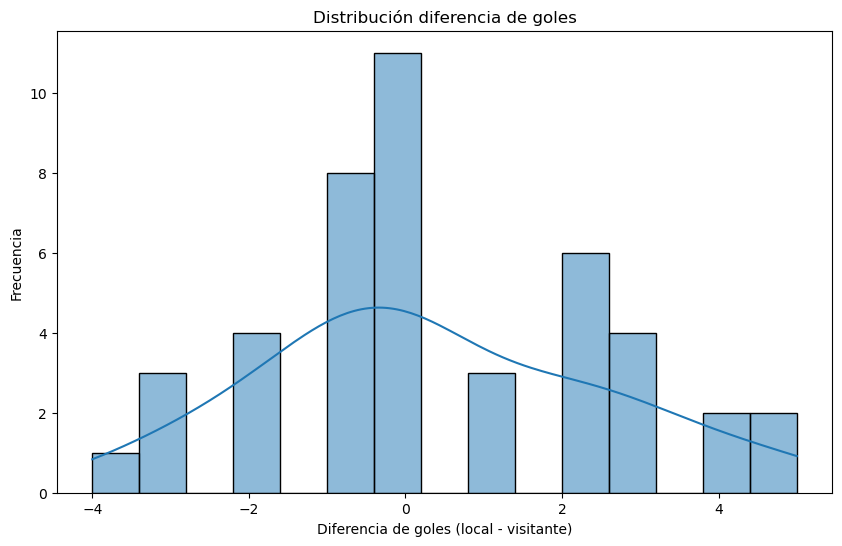

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizar la distribución de la nueva característica
plt.figure(figsize=(10, 6))
sns.histplot(df_partidos['diferencia_goles'], bins=15, kde=True)
plt.title('Distribución diferencia de goles')
plt.xlabel('Diferencia de goles (local - visitante)')
plt.ylabel('Frecuencia')
plt.show()

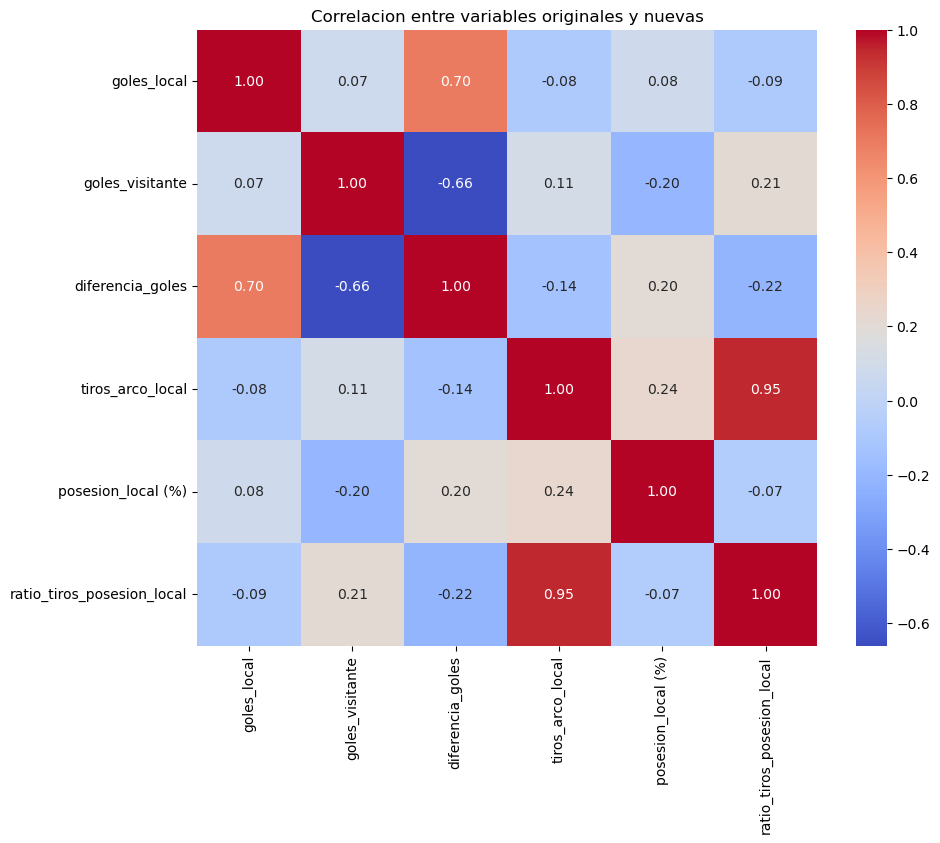

In [6]:
#Analisis de correlación
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']
corr_matrix = df_partidos[corr_vars].corr()

#Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlacion entre variables originales y nuevas')
plt.show()